# Autocorrelation   

### Import

In [1]:
import numpy as np
import pandas as pd
import mat4py as mpy
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import ipywidgets as widgets
from ipywidgets import interact, interactive_output, VBox


### Variables

In [2]:
# Define the file path for the dataset
file_path = '/Users/sigurdgjerdingen/Student/Master kode/Master_Herstad-Gjerdingen/data/Degradation_Prediction_Dataset_ISEA.mat'

## Loading history values 

In [3]:
# Load the dataset
data_loader = mpy.loadmat(file_path)
df = pd.DataFrame.from_dict(data_loader["TDS"])

In [4]:
history = (
    df.groupby("Cell")[["History", "Target_expanded"]]
      .last()  # Get the last row for each cell, for both columns
      .assign(History=lambda x: x.apply(lambda row: row["History"] + row["Target_expanded"], axis=1))
      .drop(columns="Target_expanded")
)

history


,History
Cell,
1,"[1.834012342776987, 1.8321873038112761, 1.8303..."
2,"[1.845058495451667, 1.8419984665415141, 1.8389..."
3,"[1.840036111156223, 1.8372405290428224, 1.8344..."
4,"[1.836350335297539, 1.8345300178698336, 1.8327..."
5,"[1.827606331067727, 1.8254456233245018, 1.8232..."
6,"[1.832208014322532, 1.830601191788663, 1.82899..."
7,"[1.835825928297709, 1.8339510304090747, 1.8320..."
8,"[1.835988407303375, 1.833727801546082, 1.83148..."
9,"[1.831556955767155, 1.8301691290462887, 1.8287..."


## Autocorrelation plot

### For cell 1

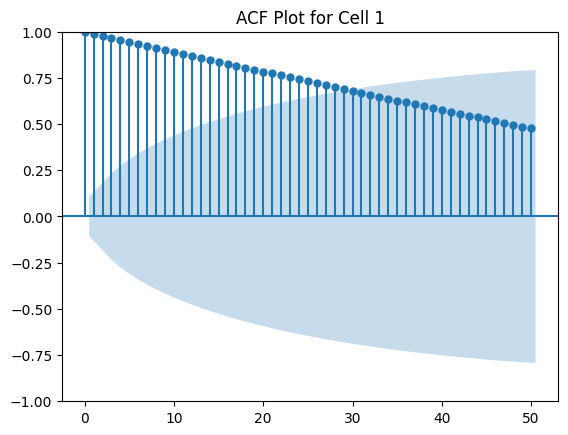

In [5]:
# Extract the first row of the history dataframe
cell_history = history.iloc[0, 0]

plot_acf(cell_history, lags=50)  # Adjust number of lags as needed
plt.title("ACF Plot for Cell 1")
plt.show()

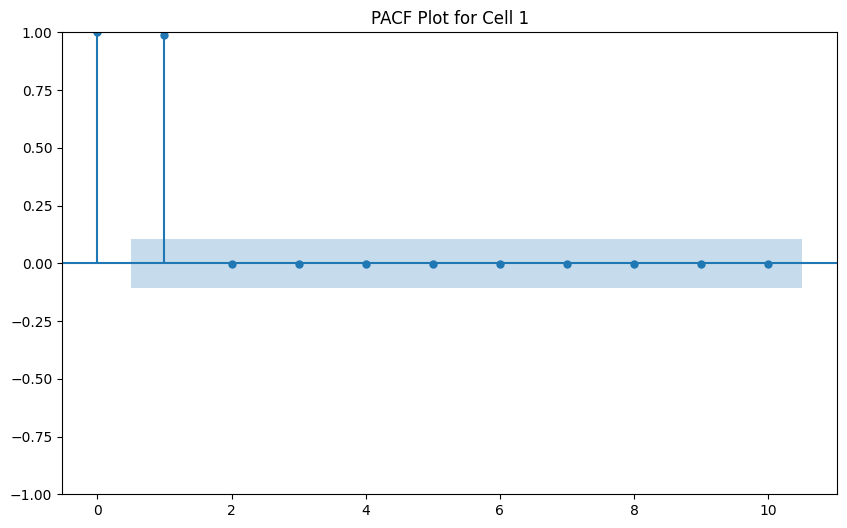

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(cell_history, lags=10, ax=ax, method='ywm')  # method='ywm' is a common choice
ax.set_title("PACF Plot for Cell 1")
plt.show()

## All cells

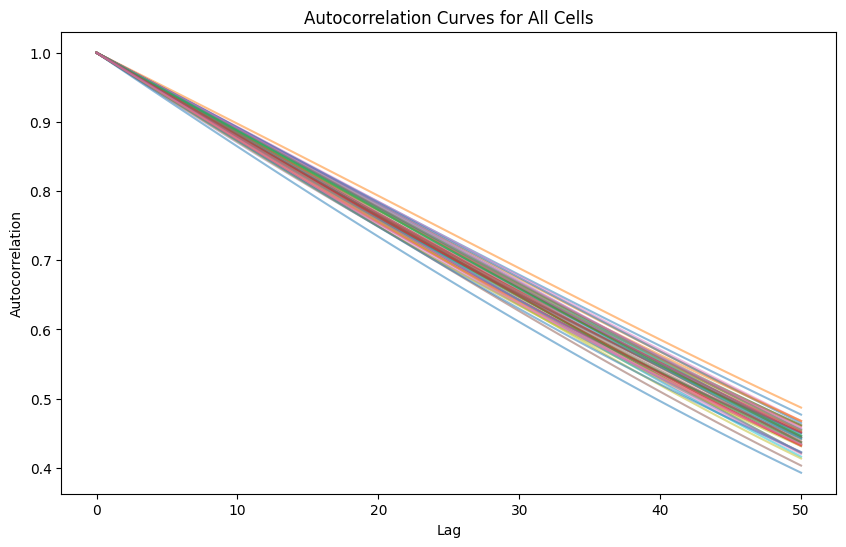

In [7]:
max_lag = 50  # Adjust as needed

plt.figure(figsize=(10, 6))

# Iterate through each cell (index) in the DataFrame
for cell in history.index:
    # Convert the list of floats from the "History" column for the selected cell into a Pandas Series
    cell_history_series = pd.Series(history.loc[cell, "History"])
    
    # Compute the ACF for this cell's series
    acf_values = acf(cell_history_series, nlags=max_lag)
    lags = np.arange(len(acf_values))
    
    # Plot the ACF curve
    plt.plot(lags, acf_values, alpha=0.5)

plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Curves for All Cells")
plt.show()

### Average

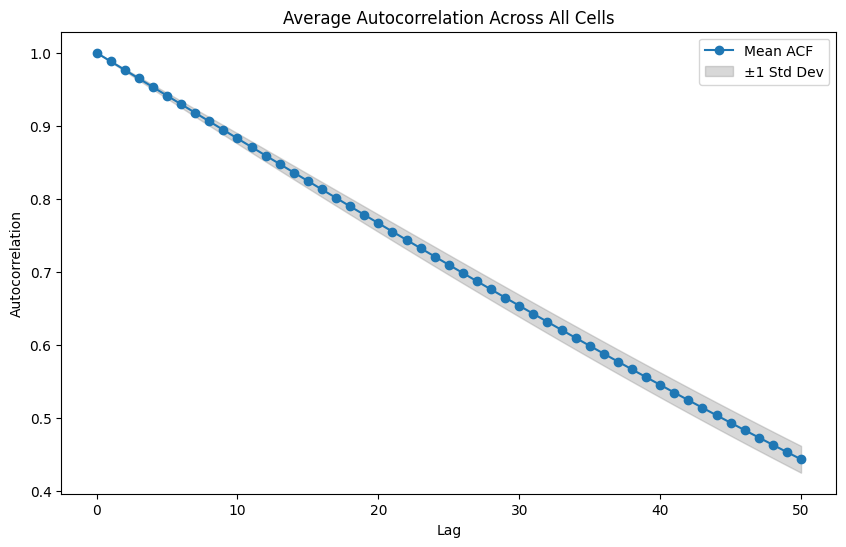

In [8]:
max_lag = 50 # Adjust as needed
all_acfs = []

for cell in history.index:
    cell_history_series = pd.Series(history.loc[cell, "History"])
    acf_values = acf(cell_history_series, nlags=max_lag)
    all_acfs.append(acf_values)

all_acfs = np.array(all_acfs)
mean_acf = np.mean(all_acfs, axis=0)
std_acf = np.std(all_acfs, axis=0)
lags = np.arange(max_lag + 1)

plt.figure(figsize=(10, 6))
plt.plot(lags, mean_acf, marker='o', label='Mean ACF')
plt.fill_between(lags, mean_acf - std_acf, mean_acf + std_acf, color='gray', alpha=0.3, label='±1 Std Dev')
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Average Autocorrelation Across All Cells")
plt.legend()
plt.show()

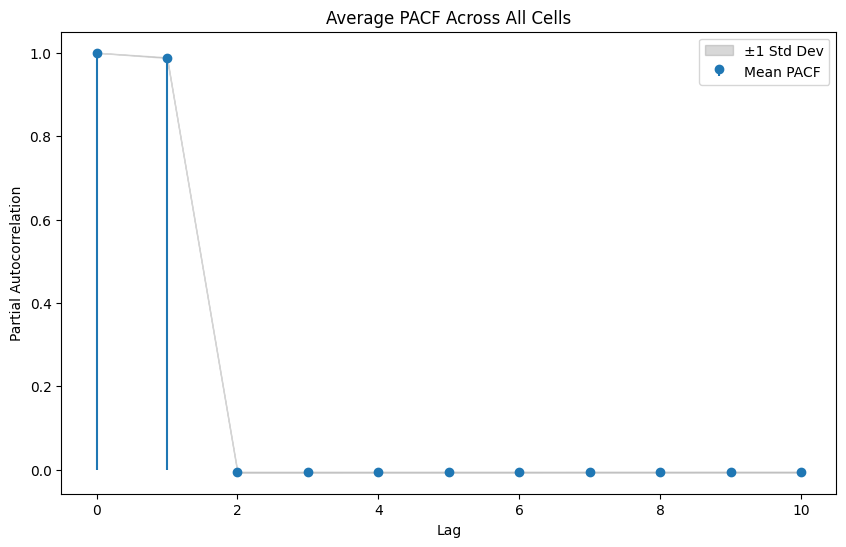

In [9]:
max_lag = 10  # Number of lags you want to consider
all_pacf_values = []  # To store PACF values for each cell

# Loop through each cell in your data structure.
# Here, we assume 'last_history' is a DataFrame with cell IDs as the index.
for cell in history.index:
    cell_history_list = history.loc[cell, "History"]
    # Convert the list to a Pandas Series
    cell_history_series = pd.Series(cell_history_list)
    # Compute PACF values using the 'ywm' method
    pacf_vals = pacf(cell_history_series, nlags=max_lag, method='ywm')
    all_pacf_values.append(pacf_vals)

# Convert to a NumPy array: shape (number of cells, max_lag+1)
all_pacf_values = np.array(all_pacf_values)

# Compute the mean and standard deviation across cells for each lag
mean_pacf = np.mean(all_pacf_values, axis=0)
std_pacf = np.std(all_pacf_values, axis=0)
lags = np.arange(max_lag + 1)

# Plot the averaged PACF
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the averaged PACF using a stem plot without 'use_line_collection'
ax.stem(lags, mean_pacf, basefmt=" ", markerfmt='o', label='Mean PACF')

# Optionally, add a shaded area representing ±1 standard deviation
ax.fill_between(lags, mean_pacf - std_pacf, mean_pacf + std_pacf, color='gray', alpha=0.3, label='±1 Std Dev')

ax.set_xlabel("Lag")
ax.set_ylabel("Partial Autocorrelation")
ax.set_title("Average PACF Across All Cells")
ax.legend()
plt.show()

### Sliding Window 

In [10]:
# Define the update function that now accepts the cell selection
def update_plot(selected_cell, window_size, lag):
    try:
        # Extract the history (list of floats) for the selected cell
        cell_history = history.loc[selected_cell, "History"]
    except Exception as e:
        print("Error extracting history for selected_cell:", e)
        return
    
    # Convert the list of floats into a Pandas Series
    series = pd.Series(cell_history)
    
    # Create a lagged version of the series
    series_lagged = series.shift(lag)
    
    # Compute the rolling autocorrelation for the selected cell
    rolling_corr = series.rolling(window=window_size).corr(series_lagged)
    
    # Create a Plotly figure with two y-axes
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    
    # Add the rolling autocorrelation trace on the primary y-axis
    fig.add_trace(
        go.Scatter(
            x=series.index, 
            y=rolling_corr, 
            mode='lines',
            name='Rolling Autocorrelation'
        ),
        secondary_y=False
    )
    
    # Add the original history series trace on the secondary y-axis
    fig.add_trace(
        go.Scatter(
            x=series.index, 
            y=series, 
            mode='lines',
            name='History Series'
        ),
        secondary_y=True
    )
    
    # Update layout and axes
    fig.update_layout(
        title_text=f"Rolling Autocorrelation and History for Cell {selected_cell}<br>(window={window_size}, lag={lag})",
        xaxis_title="Time Index",
        template="plotly_white"
    )
    fig.update_yaxes(title_text="Rolling Autocorrelation", secondary_y=False)
    fig.update_yaxes(title_text="History Series", secondary_y=True)
    
    fig.show()

# Create a Dropdown widget for cell selection
cell_dropdown = widgets.Dropdown(
    options=history.index.tolist(),  # List of cell IDs
    value=history.index.tolist()[0],  # Default value: first cell
    description='Cell'
)

# Create IntSliders for window size and lag
window_slider = widgets.IntSlider(min=10, max=50, step=1, value=20, description='Window Size')
lag_slider = widgets.IntSlider(min=1, max=10, step=1, value=3, description='Lag')

# Arrange the widgets in a vertical box
ui = VBox([cell_dropdown, window_slider, lag_slider])

# Link the update_plot function with the widgets using interactive_output
out = interactive_output(update_plot, {'selected_cell': cell_dropdown, 
                                         'window_size': window_slider, 
                                         'lag': lag_slider})

# Display the UI and output
display(ui, out)

Output()